# Swell Feather plot

In [1]:
import ndar
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

buoy = ndar.CDIPBuoy(station='100')
df = buoy.st(start_datetime=dt.datetime.now() - 1.5*dt.timedelta(days=365),
             end_datetime=dt.datetime.now())

In [2]:
df['days_ago'] = (dt.date.today() - df['datetime'].dt.date).map(lambda d: -d.days)
df['Dmean'] = df['Dmean'].astype(int)
daily = df.groupby(['days_ago', 'frequency'])[['Dmean', 'energy']].mean()

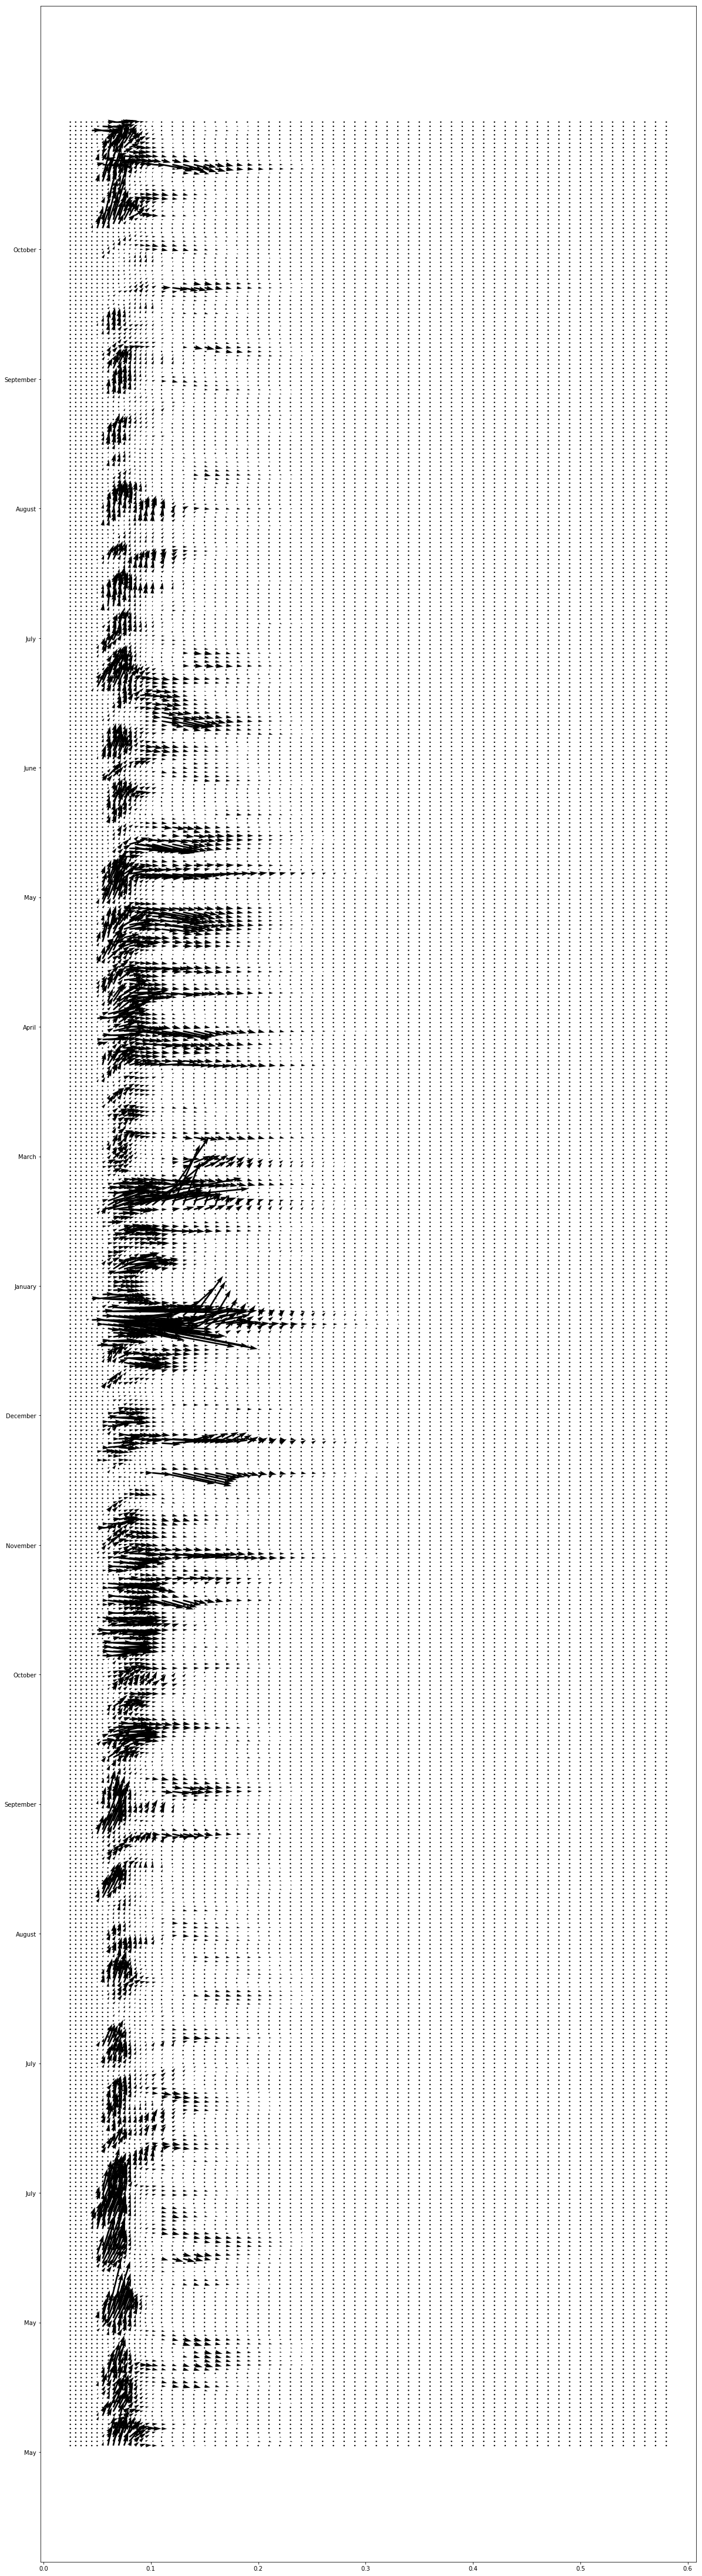

In [3]:
energy    = daily[['energy']].unstack(level=0).as_matrix().T
direction = daily[['Dmean']].unstack(level=0).as_matrix().T
frequency, days_ago = np.meshgrid(daily[['energy']].unstack(level=0).index,
                                  list(zip(*daily[['energy']].unstack(level=0).columns))[1])

plt.figure(figsize=(20, 80))
plt.quiver(frequency, days_ago,
           energy*np.sin(2*np.pi*direction/360.0 - np.pi),
           energy*np.cos(2*np.pi*direction/360.0 - np.pi))

plt.yticks(*list(zip(*[(30.5*months_ago,
                        (dt.datetime.now() + months_ago*dt.timedelta(days=30.5)).strftime('%B'))
                       for months_ago in np.arange(12*np.amin(days_ago)/365.0, 12*np.amax(days_ago)/365.0)])))

plt.show()